In [1]:
import excursion.utils as utils
from excursion import get_gp
import excursion.optimize as optimize
import numpy as np
import scipy.stats
import excursion.plotting.threedim as plots
import os
from mpl_toolkits.mplot3d import Axes3D
np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
truth0 = lambda X: np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.5,0.5,0.5], cov = np.diag([0.2,0.3,0.4])))


class scan(object):
    def __init__(self, functions):
        self.truth_functions = functions
        self.plot_rangedef = np.asarray([[0,1,31],[0,1,31],[0,1,31]])
        self.plotG = utils.mgrid(self.plot_rangedef)
        self.plotX = utils.mesh2points(self.plotG,self.plot_rangedef[:,2])

        self.acq_rangedef =  np.asarray([[0,1,11],[0,1,11],[0,1,11]])
        self.acqG = utils.mgrid(self.acq_rangedef)
        self.acqX = utils.mesh2points(self.acqG,self.acq_rangedef[:,2])

        self.mean_rangedef =  np.asarray([[0,1,11],[0,1,11],[0,1,11]])
        self.meanG = utils.mgrid(self.mean_rangedef)
        self.meanX = utils.mesh2points(self.meanG,self.mean_rangedef[:,2])
        
        self.thresholds = [0.2]
    def invalid_region(self,X):
        return np.zeros(X.shape[0], dtype = 'bool')

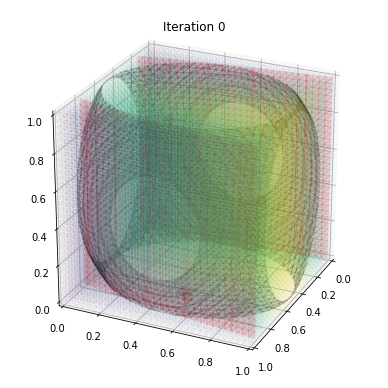

Iteration 0. new x: [[0.1 0.7 0.5]]
Iteration 0. Evaluted function 0 to values: [0.25701225]


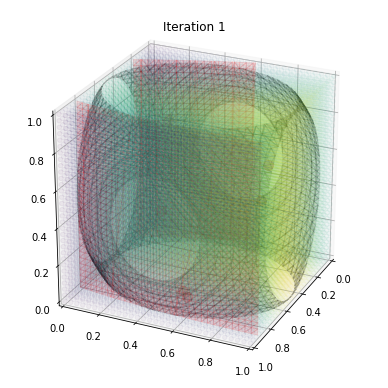

Iteration 1. new x: [[0.9 0.3 0.1]]
Iteration 1. Evaluted function 0 to values: [0.21042383]


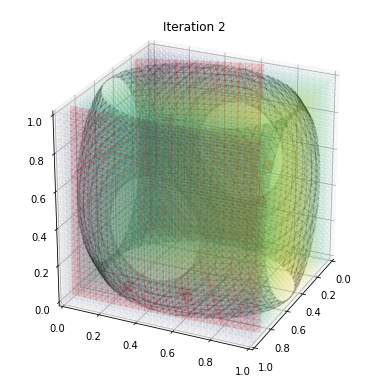

Iteration 2. new x: [[0.9 0.  0.6]]
Iteration 2. Evaluted function 0 to values: [0.17886364]


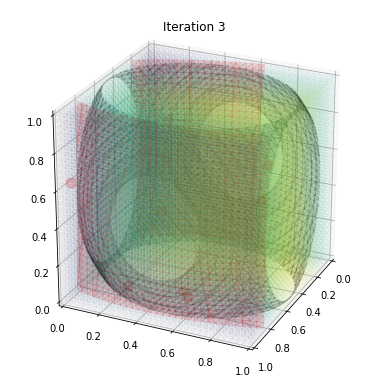

Iteration 3. new x: [[0.3 0.  0.7]]
Iteration 3. Evaluted function 0 to values: [0.2325543]


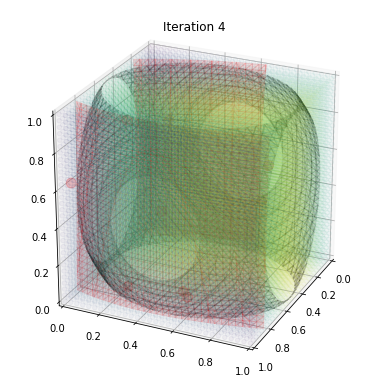

Iteration 4. new x: [[0.1 0.4 0.8]]
Iteration 4. Evaluted function 0 to values: [0.24144066]


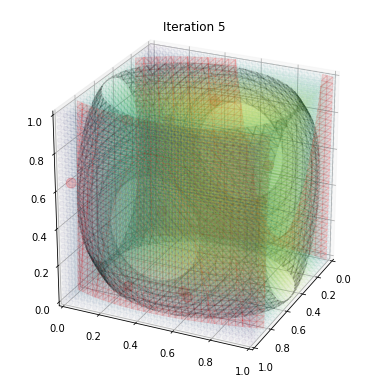

Iteration 5. new x: [[0.  0.9 0.7]]
Iteration 5. Evaluted function 0 to values: [0.15983208]


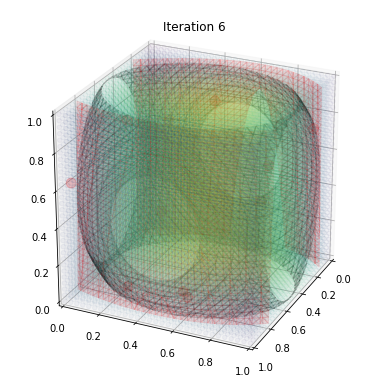

Iteration 6. new x: [[0.8 1.  0.6]]
Iteration 6. Evaluted function 0 to values: [0.21307064]


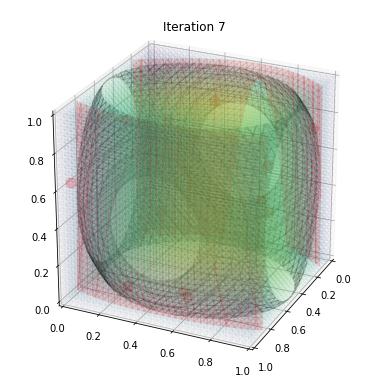

Iteration 7. new x: [[0.9 0.8 0.5]]
Iteration 7. Evaluted function 0 to values: [0.23646268]


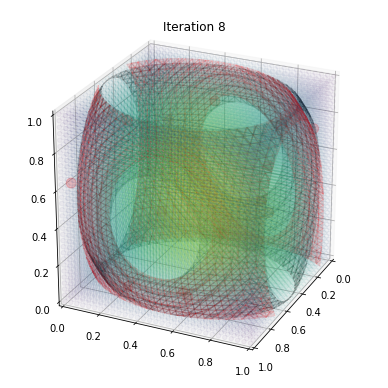

Iteration 8. new x: [[0.2 0.7 0.7]]
Iteration 8. Evaluted function 0 to values: [0.29123303]


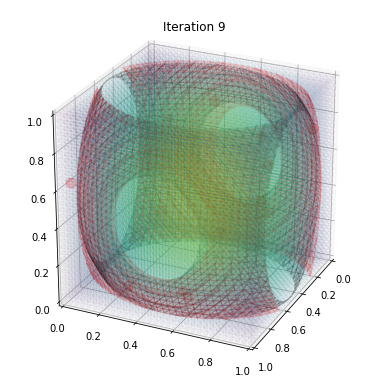

Iteration 9. new x: [[0.1 0.7 0.2]]
Iteration 9. Evaluted function 0 to values: [0.22966546]


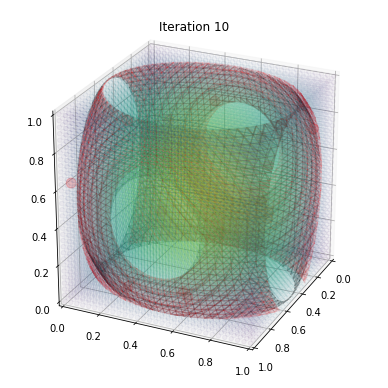

Iteration 10. new x: [[0.8 0.1 0.1]]
Iteration 10. Evaluted function 0 to values: [0.20522845]


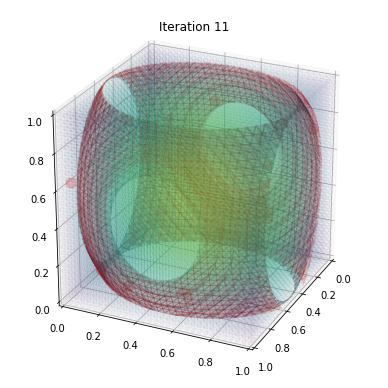

Iteration 11. new x: [[0.7 0.2 1. ]]
Iteration 11. Evaluted function 0 to values: [0.2335253]


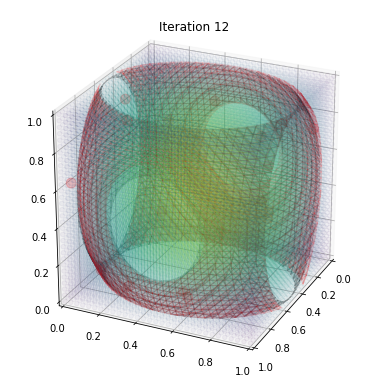

Iteration 12. new x: [[1.  0.5 0.9]]
Iteration 12. Evaluted function 0 to values: [0.17961046]


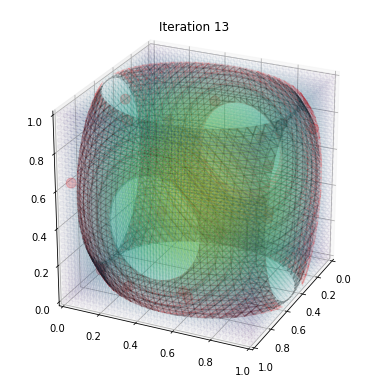

Iteration 13. new x: [[0.8 0.9 0.9]]
Iteration 13. Evaluted function 0 to values: [0.20522845]


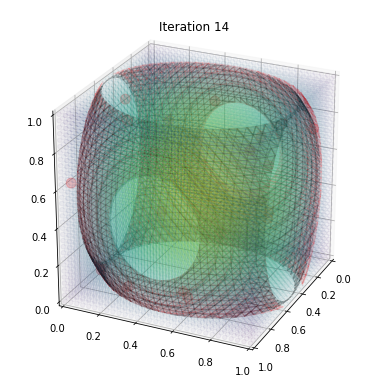

Iteration 14. new x: [[0.  0.3 0.5]]
Iteration 14. Evaluted function 0 to values: [0.20522845]


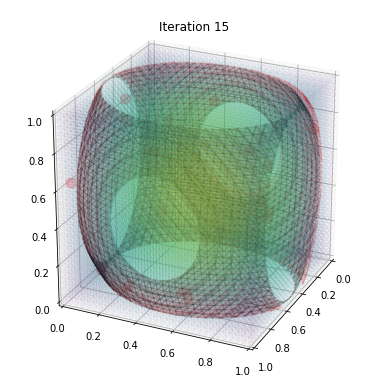

Iteration 15. new x: [[0.2 0.9 0.1]]
Iteration 15. Evaluted function 0 to values: [0.20522845]


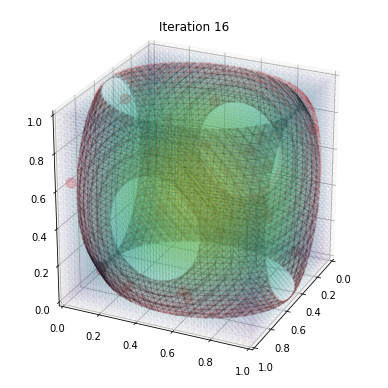

Iteration 16. new x: [[0.2 0.  0.9]]
Iteration 16. Evaluted function 0 to values: [0.17664176]


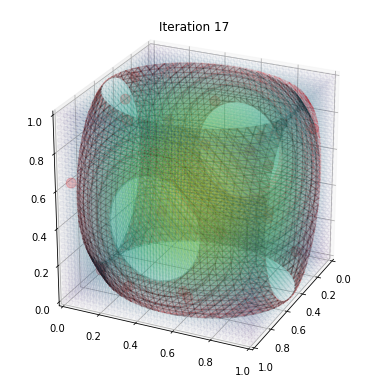

Iteration 17. new x: [[0.6 1.  0. ]]
Iteration 17. Evaluted function 0 to values: [0.19279428]


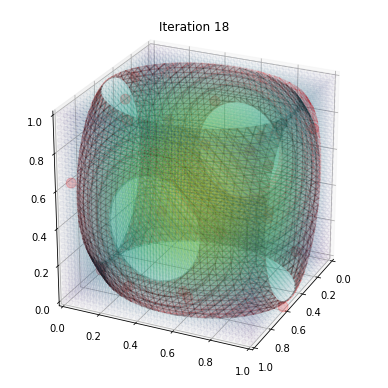

Iteration 18. new x: [[0.5 1.  1. ]]
Iteration 18. Evaluted function 0 to values: [0.1976749]


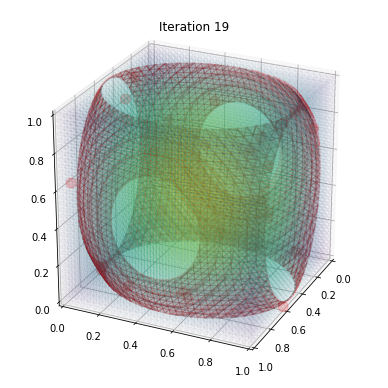

Iteration 19. new x: [[0.4 0.  0. ]]
Iteration 19. Evaluted function 0 to values: [0.19279428]


In [3]:
scandetails = scan([truth0])
X,y_list,gps = optimize.init(scandetails)

N_UPDATES = 20

def plot_and_save(workdir, index, *args):
    fig, ax = plt.subplots(1, subplot_kw={'projection': '3d'})
    axarr = [ax]
    fig.set_size_inches(5.5, 5.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails, view_init = (25,25))
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [get_gp(X,y_list[i]) for i in range(len(scandetails.truth_functions))]

    plot_and_save(workdir, index, gps,X,y_list,scandetails)

    newx, acqvals = optimize.gridsearch(gps, X, scandetails)

    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [func(np.asarray([newx])) for func in scandetails.truth_functions]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,newx])